In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt 


In [2]:
m = 50 
X = 10 * np.random.rand(m, 1) - 5
y = X**2 + 2 * X + np.random.randn(m, 1)

In [3]:
X = np.array(X)
Y = np.array(y)


feat_norm = True

print(X.shape, y.shape)

(50, 1) (50, 1)


(-3.591657534946054, 37.97386471449202)

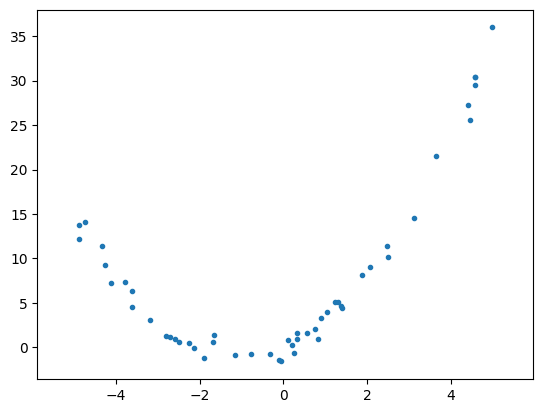

In [4]:
plt.plot(X, Y, '.')

plt.xlim(min(X) - 1, max(X) + 1)
plt.ylim(min(Y) - 2, max(Y) + 2)

In [5]:
import warnings
from warnings import filterwarnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import PolynomialFeatures
deg = 20
poly = PolynomialFeatures(degree = deg, include_bias=False)
X_Poly = poly.fit_transform(X)


In [8]:
linear = LinearRegression()
linear.fit(X_Poly, Y)

LinearRegression()

In [ ]:
print(linear.intercept_)
print(linear.coef_)
print(np.linalg.norm(linear.coef_))

In [ ]:
X_Line = np.array([[i/1000] for i in range(1000*int(min(X))- 1000, 1000*int(max(X)) + 1000, 1)])
X_Line_Poly = poly.fit_transform(X_Line)
Y_Pred_Line = linear.predict(X_Line_Poly)

In [ ]:
plt.plot(X, Y, '.')
plt.plot(X_Line, Y_Pred_Line)

plt.xlim(min(X) - 1, max(X) + 1)
plt.ylim(min(Y) - 2, max(Y) + 2)

In [ ]:
#Linear Regression

linear = LinearRegression(normalize=feat_norm)
errors = cross_val_score(linear, X_Poly, Y, scoring='neg_mean_squared_error', cv=10)
mean_error = np.mean(errors)
print(errors)
print(-mean_error)

Ridge Regularization


In [ ]:
ridge = Ridge(normalize=feat_norm, solver='saga', alpha=0.001)

ridge.fit(X_Poly, Y)

In [ ]:
Y_Pred_Ridge = ridge.predict(X_Line_Poly)
print(ridge.coef_)
print(ridge.intercept_)

In [ ]:
plt.plot(X, Y, '.')
plt.plot(X_Line, Y_Pred_Ridge)

plt.xlim(min(X) - 1, max(X) + 1)
plt.ylim(min(Y) - 2, max(Y) + 2)

In [ ]:
ridge=Ridge(normalize=feat_norm,solver='saga')
params={'alpha':[1e-5,1e-4,1e-3,1e-2,0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10,20,30,40,50,100, 200, 300, 400,500]}
Regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error',cv=10)
Regressor.fit(X_Poly, Y)

print('best parameter: ', Regressor.best_params_)
print('best score: ', -Regressor.best_score_)

LASSO Regularization

In [ ]:
lasso = Lasso(normalize=feat_norm, alpha=0.01)

lasso.fit(X_Poly, Y)

In [ ]:
Y_Pred_Lasso = lasso.predict(X_Line_Poly)
print(lasso.coef_)
print(lasso.intercept_)

In [ ]:
plt.plot(X, Y, '.')
plt.plot(X_Line, Y_Pred_Lasso)

plt.xlim(min(X) - 1, max(X) + 1)
plt.ylim(min(Y) - 2, max(Y) + 2)

In [ ]:
lasso=Lasso(normalize=feat_norm)
params={'alpha':[1e-5,1e-4,1e-3,1e-2,0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10,20,30,40,50,100, 200, 300, 400,500]}
Regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=10)
Regressor.fit(X_Poly, Y)
#Print best parameter and score
print('best parameter: ', Regressor.best_params_)
print('best score: ', -Regressor.best_score_)

Elastic Net Regularization

In [ ]:
elNet = ElasticNet(normalize=feat_norm, alpha=0.001, l1_ratio=0.01)
elNet.fit(X_Poly, Y)

In [ ]:
Y_Pred_elNet = elNet.predict(X_Line_Poly)
print(elNet.coef_)
print(elNet.intercept_)

In [ ]:
plt.plot(X, Y, '.')
plt.plot(X_Line, Y_Pred_elNet)

plt.xlim(min(X) - 1, max(X) + 1)
plt.ylim(min(Y) - 2, max(Y) + 2)

In [ ]:
#ElasticNet Regression

elastic=ElasticNet(normalize=feat_norm)
params={'alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,20,30,40,50,100,],'l1_ratio':[1e-6,1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
Regressor=GridSearchCV(elastic,params,scoring='neg_mean_squared_error',cv=10)
Regressor.fit(X,Y)
#Print best parameter and score
print('best parameter: ', Regressor.best_params_)
print('best score: ', -Regressor.best_score_)